## Assignment 2


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.datasets import make_classification, make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X, y = make_blobs(n_samples=500, centers=2, n_features=2, random_state=0)

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

intercept = np.ones((X_train.shape[0], 1))
X_train = np.concatenate((intercept, X_train), axis=1)
intercept = np.ones((X_test.shape[0], 1))
X_test = np.concatenate((intercept, X_test), axis=1)


class LogisticRegression:
    
    def __init__(self, method='mini-batch',max_iter=1000, alpha=0.001):
        self.method = method
        self.max_iter = max_iter
        self.alpha = alpha
    
    def mini_batch_GD(self,X,y):
        
        self.w = np.zeros(X.shape[1])
        
        self.loss = []
        self.iters = []
        
        batch_size = int(0.1 * X.shape[0])
        
        for i in range(self.max_iter):
            
            shuffled_index = np.random.permutation(X.shape[0])
            X_shuffled = X[shuffled_index]
            y_shuffled = y[shuffled_index]
            
            for index in range(0, X.shape[0], batch_size):
                
                batch_X = X_shuffled[index : index + batch_size]
                batch_y = y_shuffled[index : index + batch_size]
                
                cost, grad = self.gradient(batch_X, batch_y, self.w)
                self.w =self. w - self.alpha * grad
                
            if i % 500 ==0:
                print(f"Cost at iteration {i}", cost)
                self.loss.append(cost)
                self.iters.append(i)
                
        return self.w, i
    
    def plot(self):
        plt.plot(self.iters, self.loss, label='Training Losses')
        plt.xlabel('num of iters')
        plt.ylabel('training loss')
        plt.title('Training loss vs number of iters')
        plt.legend()
    
    def gradient(self, X, y, w):
        m = X.shape[0]
        h = self.h_theta(X)
        error = h - y
        cost = -np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
        grad = np.dot(X.T, error)
        return cost, grad
    
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def h_theta(self,X):
        return self.sigmoid(X @ self.w)
    
    def output(self, pred):
        return np.round(pred)
    

In [2]:
model = LogisticRegression(max_iter=20000)
w, i = model.mini_batch_GD(X_train, y_train)

Cost at iteration 0 21.907487463630055
Cost at iteration 500 5.505438047179735
Cost at iteration 1000 3.81617812004593
Cost at iteration 1500 3.5767404670554668
Cost at iteration 2000 0.988368150477158
Cost at iteration 2500 6.090589370297445
Cost at iteration 3000 5.86974773238694
Cost at iteration 3500 6.257650676650426
Cost at iteration 4000 0.9615063959993958
Cost at iteration 4500 0.12186141793811396
Cost at iteration 5000 3.6423524918331576
Cost at iteration 5500 9.66976349767411
Cost at iteration 6000 2.1060596748277303
Cost at iteration 6500 3.6183372820623116
Cost at iteration 7000 4.4049117068074
Cost at iteration 7500 2.725044617659069
Cost at iteration 8000 1.8796949441948754
Cost at iteration 8500 6.438385331615185
Cost at iteration 9000 1.705128116939345
Cost at iteration 9500 2.2806361348728963
Cost at iteration 10000 3.6703608300034443
Cost at iteration 10500 5.287707679315809
Cost at iteration 11000 6.8404006369448584
Cost at iteration 11500 1.479063039713326
Cost at i

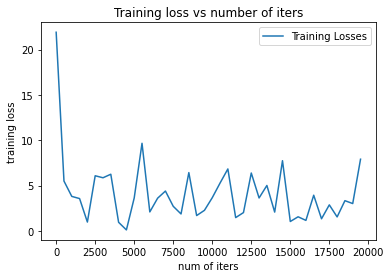

In [3]:
model.plot()

In [4]:
yhat = model.h_theta(X_test)
y_pred = model.output(yhat)
y_pred

array([1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1.,
       0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1.,
       0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0.,
       1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
       1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0.,
       1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1.,
       0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.])

In [5]:
class classification_report:
    
    def __init__(self, actual, predict):
        self.actual = actual
        self.predict = predict
        
        self.TP = sum((self.actual == 1) & (self.predict == 1))
        self.TN = sum((self.actual == 0) & (self.predict == 0))
        self.FP = sum((self.actual == 0) & (self.predict ==1))
        self.FN = sum((self.actual == 1) & (self.predict == 0))
    
    def accuracy(self):
        self.acc = (self.TP + self.TN) / (self.TP + self.TN + self.FP + self.FN)
        return self.acc
    
    def precision(self):
        self.pre = self.TP / (self.TP + self.FP)
        return self.pre
    
    def recall(self):
        self.rec = self.TP / (self.TP + self.FN)
        return self.rec
    
    def f1(self):
        self.F1 = 2 * (self.precision() * self.recall()) / (self.precision() + self.recall())
        return self.F1

In [6]:
report = classification_report(y_test, y_pred)
accuracy = report.accuracy()
recall = report.recall()
precision = report.precision()
f1 = report.f1()
print("accuracy: ", round(accuracy, 2))
print("recall: ", round(recall, 2))
print("precision: ", round(precision, 2))
print("f1: ", round(f1, 2))

accuracy:  0.95
recall:  0.94
precision:  0.96
f1:  0.95
